`Joshua Kyle K. Entrata   4CSC`


## Machine Problem 2: General Path


In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
from PIL import Image, ImageDraw, ImageFont

### Cross - Lines and Curves


**Create Quadratic Curve function**


In [28]:
def quad_curve(t, p0, p1, p2):
    def point(index):
        first_grp = ((1.0 - t) ** 2.0) * p0[index]
        second_grp = 2.0 * (1.0 - t) * t * p1[index]
        third_grp = (t ** 2.0) * p2[index]
        
        return first_grp + second_grp + third_grp
        
    x = point(0)
    y = point(1)

    return x, y

**Create Cross using Lines and Curves**


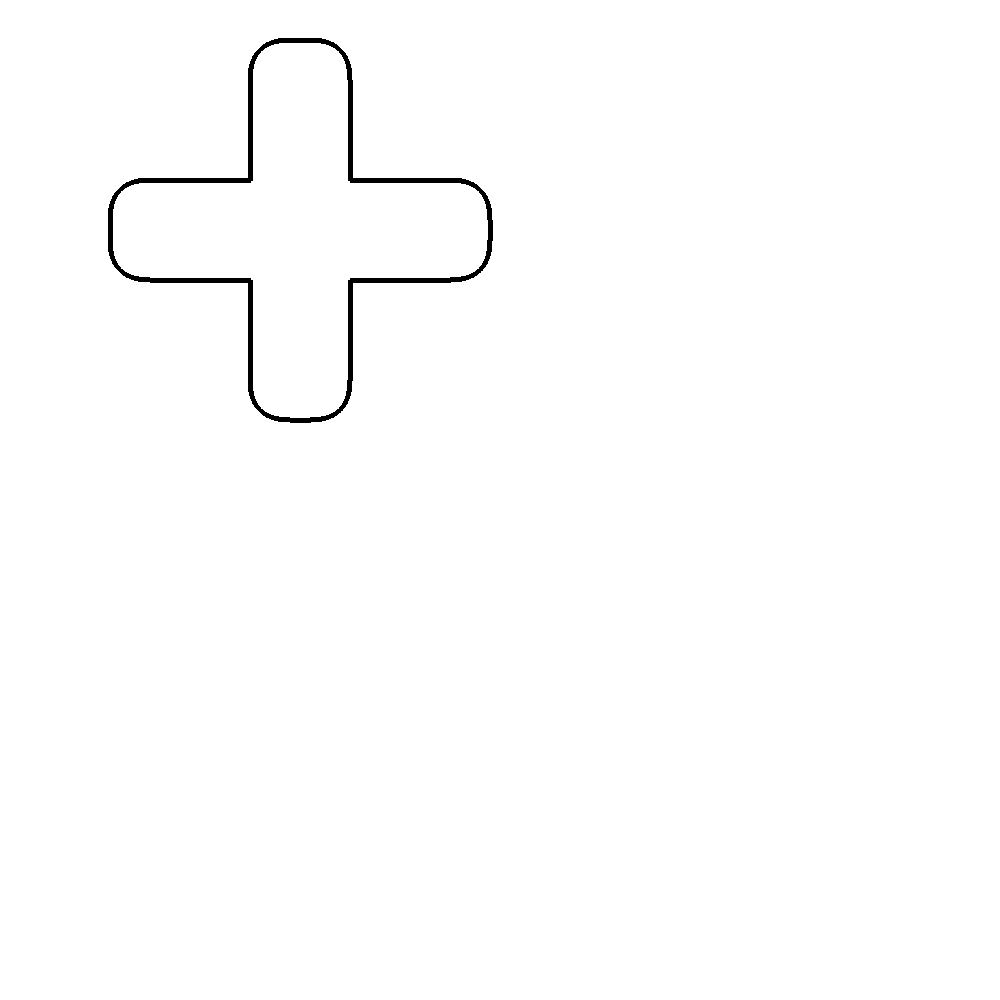

In [29]:
cross_img = Image.new('RGB', (1000, 1000), (255, 255, 255))
cross_draw = ImageDraw.Draw(cross_img)
font= ImageFont.load_default()

# south cross part
cross_draw.line((250, 280, 250, 380), fill='black', width=5)
quad1 = [quad_curve(t, (250, 380), (250, 420), (290, 420)) for t in [(i/100) for i in range(101)]]
cross_draw.line(quad1, fill='black', width=5)
cross_draw.line((290, 420, 310, 420), fill='black', width=5)
quad2 = [quad_curve(t, (310, 420), (350, 420), (350, 380)) for t in [(i/100) for i in range(101)]]
cross_draw.line(quad2, fill='black', width=5)
cross_draw.line((350, 380, 350, 280), fill='black', width=5)

# east cross part
cross_draw.line((350, 280, 450, 280), fill='black', width=5)
quad3 = [quad_curve(t, (450, 280), (490, 280), (490, 240)) for t in [(i/100) for i in range(101)]]
cross_draw.line(quad3, fill='black', width=5)
cross_draw.line((490, 240, 490, 220), fill='black', width=5)
quad4 = [quad_curve(t, (490, 220), (490, 180), (450, 180)) for t in [(i/100) for i in range(101)]]
cross_draw.line(quad4, fill='black', width=5)
cross_draw.line((450, 180, 350, 180), fill='black', width=5)

# north cross part
cross_draw.line((350, 180, 350, 80), fill='black', width=5)
quad5 = [quad_curve(t, (350, 80), (350, 40), (310, 40)) for t in [(i/100) for i in range(101)]]
cross_draw.line(quad5, fill='black', width=5)
cross_draw.line((310, 40, 290, 40), fill='black', width=5)
quad6 = [quad_curve(t, (290, 40), (250, 40), (250, 80)) for t in [(i/100) for i in range(101)]]
cross_draw.line(quad6, fill='black', width=5)
cross_draw.line((250, 80, 250, 180), fill='black', width=5)

# west cross part
cross_draw.line((250, 180, 150, 180), fill='black', width=5)
quad7 = [quad_curve(t, (150, 180), (110, 180), (110, 220)) for t in [(i/100) for i in range(101)]]
cross_draw.line(quad7, fill='black', width=5)
cross_draw.line((110, 220, 110, 240), fill='black', width=5)
quad8 = [quad_curve(t, (110, 240), (110, 280), (150, 280)) for t in [(i/100) for i in range(101)]]
cross_draw.line(quad8, fill='black', width=5)
cross_draw.line((150, 280, 250, 280), fill='black', width=5)

cross_img

### Cross - General Path


In [30]:
cross_vertices = [
    # south cross part
    (250, 280),
    (250, 380),
    (250, 420), (290, 420),
    (310, 420),
    (350, 420), (350, 380),
    (350, 280),
    
    # east cross part
    (450, 280),
    (490, 280), (490, 240),
    (490, 220),
    (490, 180), (450, 180),
    (350, 180),
    
    # north cross part
    (350, 80),
    (350, 40), (310, 40),
    (290, 40),
    (250, 40), (250, 80),
    (250, 180),
    
    # west cross part
    (150, 180),
    (110, 180), (110, 220),
    (110, 240),
    (110, 280), (150, 280),
    (250, 280),
]

cross_codes = [
    path.Path.MOVETO,
    path.Path.LINETO,
    path.Path.CURVE3, path.Path.CURVE3,
    path.Path.LINETO,
    path.Path.CURVE3, path.Path.CURVE3,
    path.Path.LINETO,
    
    path.Path.LINETO,
    path.Path.CURVE3, path.Path.CURVE3,
    path.Path.LINETO,
    path.Path.CURVE3, path.Path.CURVE3,
    path.Path.LINETO,
    
    path.Path.LINETO,
    path.Path.CURVE3, path.Path.CURVE3,
    path.Path.LINETO,
    path.Path.CURVE3, path.Path.CURVE3,
    path.Path.LINETO,
    
    path.Path.LINETO,
    path.Path.CURVE3, path.Path.CURVE3,
    path.Path.LINETO,
    path.Path.CURVE3, path.Path.CURVE3,
    path.Path.CLOSEPOLY,
]

In [31]:
cross_vertices_inverted = [(x, 1000 - y) for (x, y) in cross_vertices]
cross_path = path.Path(cross_vertices_inverted, cross_codes)

cross_patch = patches.PathPatch(
    cross_path,
    facecolor='white', 
    edgecolor='black',
    lw=2
)

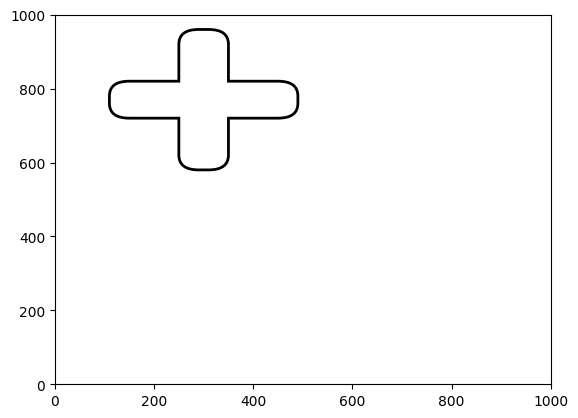

In [32]:
fig, ax = plt.subplots()
ax.add_patch(cross_patch)
ax.set_xlim(0, 1000)
ax.set_ylim(0, 1000)
plt.show()

### Christmas Tree - General Path


**Star**


In [33]:
star_vertices = [
    (300, 100),
    (320, 120),
    (300, 140),
    (280, 120),
    (300, 100)
]

star_codes = [
    path.Path.MOVETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
]

In [34]:
star_vertices_inverted = [(x, 1000 - y) for (x, y) in star_vertices]
star_path = path.Path(star_vertices_inverted, star_codes)

star_patch = patches.PathPatch(
    star_path,
    facecolor='gold', 
    lw=0
)

**Tree**


In [35]:
tree_vertices = [
    (300, 140),
    (370, 290), # right first level
    (350, 290),
    (410, 440), # right second level
    (390, 440),
    (450, 590), # right third level
    (150, 590), # left third level
    (210, 440),
    (190, 440), # left second level
    (250, 290), 
    (230, 290), # left first level
    (300, 140)
]

tree_codes = [
    path.Path.MOVETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
]

In [36]:
tree_vertices_inverted = [(x, 1000 - y) for (x, y) in tree_vertices]
tree_path = path.Path(tree_vertices_inverted, tree_codes)

tree_patch = patches.PathPatch(
    tree_path,
    facecolor='limegreen', 
    lw=0
)

**Base**


In [37]:
base_vertices = [
    (315, 590),
    (315, 620),
    (285, 620),
    (285, 590),
    (315, 590)
]

base_codes = [
    path.Path.MOVETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
]

In [38]:
base_vertices_inverted = [(x, 1000 - y) for (x, y) in base_vertices]
base_path = path.Path(base_vertices_inverted, base_codes)

base_patch = patches.PathPatch(
    base_path,
    facecolor='gray', 
    lw=0
)

**Christmas Tree**


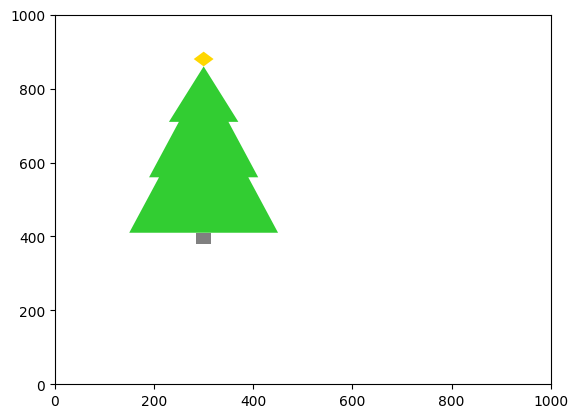

In [39]:
fig, ax = plt.subplots()
ax.add_patch(star_patch)
ax.add_patch(tree_patch)
ax.add_patch(base_patch)
ax.set_xlim(0, 1000)
ax.set_ylim(0, 1000)
plt.show()